In [3]:
import pandas as pd



In [4]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import *
from sqlalchemy.orm import sessionmaker
engine = create_engine("sqlite:///horseracing.db")
sqlite_connection = engine.connect()



## Add Dataframes to SQL

In [26]:
sqlite_table = "tbl_racing_results"
df_results.to_sql(sqlite_table, sqlite_connection, if_exists='append', index=False)

In [28]:
sqlite_table = "tbl_trackwork"
df_tracks.to_sql(sqlite_table, sqlite_connection, if_exists='append', index=False)

In [29]:
sqlite_table = "tbl_horse_info"
df_horse.to_sql(sqlite_table, sqlite_connection, if_exists='append', index=False)

In [30]:
sqlite_table = "tbl_comments"
df_comments.to_sql(sqlite_table, sqlite_connection, if_exists='append', index=False)

In [31]:
sqlite_table = "tbl_barrier"
df_barrier.to_sql(sqlite_table, sqlite_connection, if_exists='append', index=False)

In [32]:
3326/10886

0.3055300385816645

In [5]:
query = """select *,
case when plc in (1,2,3) then 1 else 0 end as Target_Value
from tbl_racing_results
"""


df_sql = pd.read_sql(query, engine)

In [6]:
df_sql

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,...,venue,horse_ch,jockey_ch,trainer_ch,class_ch,going_ch,handicap_ch,course_ch,venue_ch,Target_Value
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,...,Happy Valley,威百利(S243),何澤堯,方嘉柏,1,好地至快地,畢拿山讓賽,草地 - A 賽道,跑馬地,1
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,...,Sha Tin,太陽喜喜(T242),柏寶,賀賢,1,好地至快地,香港大學基金讓賽,草地 - A+3 賽道,沙田,1
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,...,Happy Valley,王將(S165),黃皓楠,徐雨石,1,好地至快地,麗安讓賽,草地 - B 賽道,跑馬地,1
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,...,Sha Tin,人民武士(T305),巫斯義,約翰摩亞,1,好地至快地,ＢＲＥＧＵＥＴ平磅賽,草地 - B+2 賽道,沙田,1
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,...,Happy Valley,至尊駿爵(P344),柏寶,蘇偉賢,1,好地至快地,宏德讓賽,草地 - C 賽道,跑馬地,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,15,WV,NaN,PLANET STAR(A049),Z Purton,P O'Sullivan,126.0,NaN,NaN,---,...,Sha Tin,紅旗星將(A049),潘頓,蘇保羅,1,好地至快地,牛尾海讓賽,草地 - B+2 賽道,沙田,0
14208,15,WV,NaN,VICTORY DAY(V079),M L Yeung,A Lee,119.0,NaN,NaN,---,...,Sha Tin,勝利日(V079),楊明綸,李易達,1,好地,興業讓賽,草地 - B+2 賽道,沙田,0
14209,15,WV,5.0,BISHOP'S LEAP(V190),K C Ng,A S Cruz,119.0,975.0,NaN,---,...,Sha Tin,將譽(V190),吳嘉晉,告東尼,1,好地,氹仔讓賽,全天候跑道,沙田,0
14210,15,WV,NaN,FOODIE(S434),H W Lai,C S Shum,127.0,1076.0,NaN,---,...,Sha Tin,為食仔(S434),黎海榮,沈集成,1,好地,粵港合作讓賽,全天候跑道,沙田,0


<ipython-input-17-c560e5096376>:8: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));


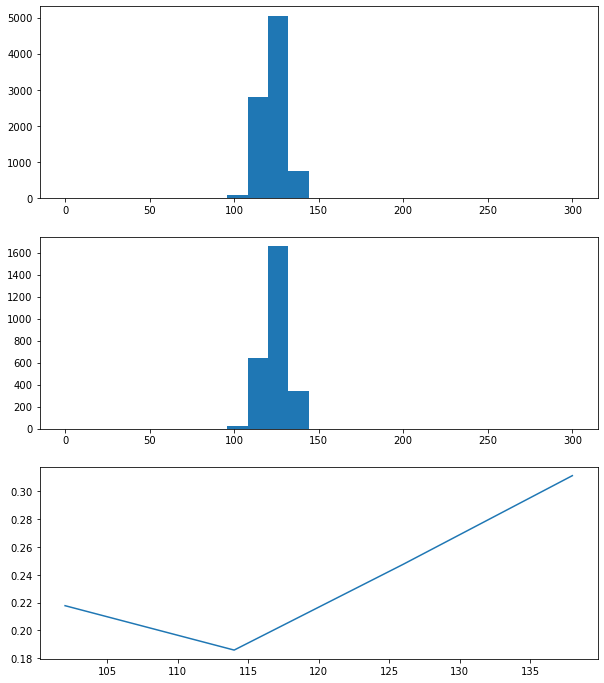

In [17]:
import matplotlib.pyplot as plt

# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'actualwt'], bins=25, range=(0,300))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'actualwt'], bins=25, range=(0,300))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));